In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.2 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=76775af170bce539d85f3d509dc8375795b00e229f63263ecaa6862393c61e42
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedr

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/09/25 19:56:11] INFO     No custom team name replacements found. You can configure these in       ]8;id=335909;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=84321;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=988481;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=257444;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2425)
print(fbref.__doc__)

[06/09/25 19:56:13] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=264216;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=132998;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/09/25 19:56:19] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=210777;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=647479;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [7]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/09/25 19:56:34] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=522272;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=948770;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Performance                 \
                                                       CrdY CrdR 2CrdY Fls   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White               2    0     0  10   
                                  Bukayo Saka             3    0     0  15   
                                  David Raya              3    0     0   1   
                                  Declan Rice             7    1     1  21   
                                  Ethan Nwaneri           1    0     0   9   

                                                     ...                      \
                                                Fld  ...  Crs Int TklW PKwon   
league             season team    player             ...                       
ENG-Premier League 2425   Arsenal Ben White       5  ...   17  16   14     0   
                                  Bukayo Saka    39  ...  117   3   15     1   
                                  David Raya     10  ...    0   2    0     0   
                                  Declan Rice    16  ...  164  25   25     0   
                                  Ethan Nwaneri   5  ...   54   2    7     0   

                                                               Aerial Duels  \
                                                PKcon OG Recov          Won   
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White         0  0    37           18   
                                  Bukayo Saka       0  0    70           10   
                                  David Raya        1  0    41           13   
                                  Declan Rice       0  0   156           37   
                                  Ethan Nwaneri     0  0    34            4   

                                                             
                                                Lost   Won%  
league             season team    player                     
ENG-Premier League 2425   Arsenal Ben White        9   66.7  
                                  Bukayo Saka     20   33.3  
                                  David Raya       0  100.0  
                                  Declan Rice     25   59.7  
                                  Ethan Nwaneri    8   33.3  

[5 rows x 21 columns]

In [8]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Performance  ...                                    Aerial Duels       \
               CrdY  ...  Crs Int TklW PKwon PKcon OG Recov          Won Lost   
0  13.3           2  ...   17  16   14     0     0  0    37           18    9   
1  19.2           3  ...  117   3   15     1     0  0    70           10   20   
2  38.0           3  ...    0   2    0     0     1  0    41           13    0   
3  31.4           7  ...  164  25   25     0     0  0   156           37   25   
4   9.9           1  ...   54   2    7     0     0  0    34            4    8   

          
    Won%  
0   66.7  
1   33.3  
2  100.0  
3   59.7  
4   33.3  

[5 rows x 25 columns]

In [9]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

[06/09/25 19:56:43] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=283258;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=305254;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Tackles                       \
                                                    Tkl TklW Def 3rd Mid 3rd   
league             season team    player                                       
ENG-Premier League 2425   Arsenal Ben White          20   14      10       4   
                                  Bukayo Saka        29   15       9      11   
                                  David Raya          0    0       0       0   
                                  Declan Rice        53   25      22      25   
                                  Ethan Nwaneri      11    7       4       4   

                                                         ... Challenges        \
                                                Att 3rd  ...        Att  Tkl%   
league             season team    player                 ...                    
ENG-Premier League 2425   Arsenal Ben White           6  ...         38  42.1   
                                  Bukayo Saka         9  ...         24  54.2   
                                  David Raya          0  ...          2   0.0   
                                  Declan Rice         6  ...         41  41.5   
                                  Ethan Nwaneri       3  ...         21  33.3   

                                                     Blocks          Int  \
                                                Lost Blocks  Sh Pass       
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       22     10   8    2  16   
                                  Bukayo Saka     11     22   0   22   3   
                                  David Raya       2      0   0    0   2   
                                  Declan Rice     24     27  13   14  25   
                                  Ethan Nwaneri   14      8   2    6   2   

                                                Tkl+Int Clr Err  
                                                                 
league             season team    player                         
ENG-Premier League 2425   Arsenal Ben White          36  44   0  
                                  Bukayo Saka        32   8   0  
                                  David Raya          2  21   9  
                                  Declan Rice        78  51   0  
                                  Ethan Nwaneri      13   4   1  

[5 rows x 21 columns]

In [10]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Tackles  ... Challenges            Blocks          Int Tkl+Int Clr Err  
            Tkl  ...        Att  Tkl% Lost Blocks  Sh Pass                      
0  13.3      20  ...         38  42.1   22     10   8    2  16      36  44   0  
1  19.2      29  ...         24  54.2   11     22   0   22   3      32   8   0  
2  38.0       0  ...          2   0.0    2      0   0    0   2       2  21   9  
3  31.4      53  ...         41  41.5   24     27  13   14  25      78  51   0  
4   9.9      11  ...         21  33.3   14      8   2    6   2      13   4   1  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP','Expected_xAG',]
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost','Performance_Fls','Performance_CrdY','Performance_CrdR','Performance_2CrdY','Performance_Crs',]
]
df_def_selected = player_season_def[
    ['player_', 'team_','Challenges_Tkl', 'Challenges_Att','Challenges_Tkl%','Int_', 'Err_']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

         player_    team_   pos_  age_  Playing Time_Min  Progression_PrgC  \
0      Ben White  Arsenal     DF    26              1198                23   
1    Bukayo Saka  Arsenal  FW,MF    22              1729                96   
2     David Raya  Arsenal     GK    28              3420                 0   
3    Declan Rice  Arsenal     MF    25              2825                90   
4  Ethan Nwaneri  Arsenal  FW,MF    17               895                46   

   Progression_PrgP  Expected_xAG  Aerial Duels_Won%  Aerial Duels_Won  ...  \
0                59           1.4               66.7                18  ...   
1                70           7.6               33.3                10  ...   
2                14           0.0              100.0                13  ...   
3               192           6.6               59.7                37  ...   
4                33           1.2               33.3                 4  ...   

   Performance_Fls  Performance_CrdY  Performance_CrdR  

In [13]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


               player_    team_ pos_  age_  Playing Time_Min  \
0            Ben White  Arsenal   DF    26              1198   
6    Gabriel Magalhães  Arsenal   DF    26              2363   
8         Jakub Kiwior  Arsenal   DF    24              1122   
10      Jurriën Timber  Arsenal   DF    23              2417   
16  Myles Lewis-Skelly  Arsenal   DF    17              1369   

    Progression_PrgC  Progression_PrgP  Expected_xAG  Aerial Duels_Won%  \
0                 23                59           1.4               66.7   
6                 10               126           0.9               58.9   
8                  5                48           0.3               45.8   
10                57               146           0.8               52.4   
16                37                71           0.4               52.4   

    Aerial Duels_Won  ...  Performance_Fls  Performance_CrdY  \
0                 18  ...               10                 2   
6                 53  ...           

In [14]:
# Selecionar as colunas desejadas para análise
Lat = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Expected_xAG'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Performance_Fls'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Performance_Crs'),
    ('Challenges_Tkl'),
    ('Challenges_Att'),
    ('Challenges_Tkl%'),
    ('Int_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Lat.columns = ['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Lat.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
Lat['Aerial Duels '] = (
    Lat['Aerial Duel%'].astype(str) + '% (' +
    Lat['Aerial Duel Won'].astype(str) + '/' +
    Lat['Aerial Duel Lost'].astype(str) + ')')
# Remover jogadores com todas as métricas iguais a 0
Lat = Lat[(Lat[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]

# Exportar o dataframe para um arquivo CSV
Lat.to_csv('Lat_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para conferir
Lat.head


               jogador     time posicao  idade  Minutos  Prgc  PrgP  xAG  \
0            Ben White  Arsenal      DF     26     1198    23    59  1.4   
6    Gabriel Magalhães  Arsenal      DF     26     2363    10   126  0.9   
8         Jakub Kiwior  Arsenal      DF     24     1122     5    48  0.3   
10      Jurriën Timber  Arsenal      DF     23     2417    57   146  0.8   
16  Myles Lewis-Skelly  Arsenal      DF     17     1369    37    71  0.4   

    Aerial Duel%  Aerial Duel Won  ...  Fouls  Yellow Card  Red Card  \
0           66.7               18  ...     10            2         0   
6           58.9               53  ...     19            4         0   
8           45.8               11  ...     10            1         0   
10          52.4               22  ...     31            7         0   
16          52.4               11  ...     11            3         2   

    2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  \
0               0     17             

<bound method NDFrame.head of                  jogador     time posicao  idade  Minutos  Prgc  PrgP  xAG  \
0              Ben White  Arsenal      DF     26     1198    23    59  1.4   
6      Gabriel Magalhães  Arsenal      DF     26     2363    10   126  0.9   
8           Jakub Kiwior  Arsenal      DF     24     1122     5    48  0.3   
10        Jurriën Timber  Arsenal      DF     23     2417    57   146  0.8   
16    Myles Lewis-Skelly  Arsenal      DF     17     1369    37    71  0.4   
...                  ...      ...     ...    ...      ...   ...   ...  ...   
2838           Jay Idzes  Venezia      DF     24     3127    15    84  0.7   
2842   Joël Schingtienne  Venezia      DF     21     1122     5    28  0.1   
2845        Marin Šverko  Venezia      DF     26     1117     8    38  0.3   
2846     Michael Svoboda  Venezia      DF     25     1314    13    43  0.6   
2852     Ridgeciano Haps  Venezia      DF     31     1369    26    52  0.7   

      Aerial Duel%  Aerial Duel Won  ...  Yellow Card  Red Card  \
0             66.7               18  ...            2         0   
6             58.9               53  ...            4         0   
8             45.8               11  ...            1         0   
10            52.4               22  ...            7         0   
16            52.4               11  ...            3         2   
...            ...              ...  ...          ...       ...   
2838          41.3               57  ...            5         0   
2842          22.2                4  ...            2         0   
2845          50.0               20  ...            3         0   
2846          55.6               35  ...            1         0   
2852          43.8               14  ...            3         0   

      2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  \
0                 0     17               16               38       42.1   
6                 0      9               12               16       75.0   
8                 0      2               11               15       73.3   
10                0     28               18               27       66.7   
16                0     10               10               11       90.9   
...             ...    ...              ...              ...        ...   
2838              0      6               17               33       51.5   
2842              0      0               12               19       63.2   
2845              0      2               10               12       83.3   
2846              0      2                8               19       42.1   
2852              0     26               14               22       63.6   

      Interceptacao  Erros  Aerial Duels   
0                16      0   66.7% (18/9)  
6                16      2  58.9% (53/37)  
8                 6      3  45.8% (11/13)  
10               22      1  52.4% (22/20)  
16                7      0  52.4% (11/10)  
...             ...    ...            ...  
2838             32      0  41.3% (57/81)  
2842             14      5   22.2% (4/14)  
2845             16      3  50.0% (20/20)  
2846             22      2  55.6% (35/28)  
2852              7      0  43.8% (14/18)  

[610 rows x 22 columns]>

### **2. Criar modelos de classificação para  (Laterais)**

In [37]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Lat['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros']])

      Prgc  PrgP  xAG  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Interceptacao  Erros
0       23    59  1.4               18                 9     10            2         0              0     17               16               38             16      0
6       10   126  0.9               53                37     19            4         0              0      9               12               16             16      2
8        5    48  0.3               11                13     10            1         0              0      2               11               15              6      3
10      57   146  0.8               22                20     31            7         0              0     28               18               27             22      1
16      37    71  0.4               11                10     11            3         2              0     10               10               11              7      0
...    ...

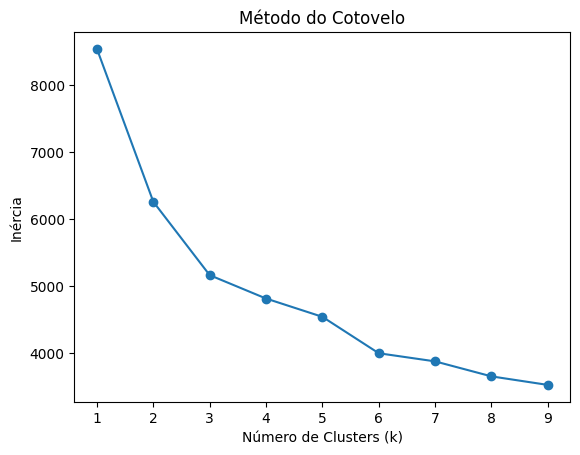

In [38]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [31]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [39]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Lat.groupby('Cluster').agg({col: 'mean' for col in Lat.select_dtypes(include=['number']).columns})
print(cluster_summary)

             idade      Minutos       Prgc        PrgP       xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost      Fouls  Yellow Card  Red Card  2 Yellow Card      Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao     Erros  Cluster  Prgc_Pontuacao  PrgP_Pontuacao  xAG_Pontuacao  Fouls_Pontuacao  Yellow Card_Pontuacao  Red Card_Pontuacao  Cross_Pontuacao  Desarmes Certos_Pontuacao  Interceptacao_Pontuacao  Erros_Pontuacao  Pontuacao_Total  Pontuacao
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
0        26.279762  2445.791667  17.904762   90.4702

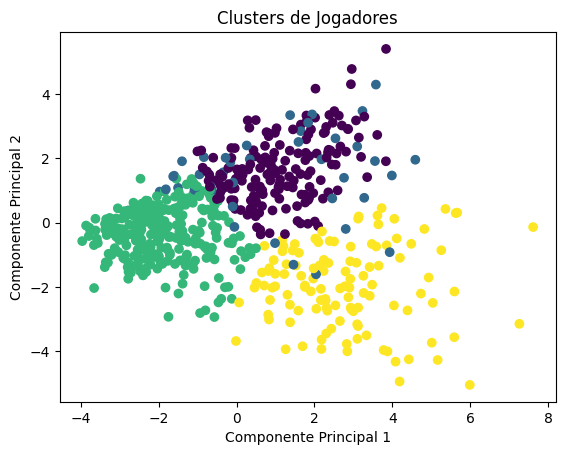

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [41]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Lat.select_dtypes(include=np.number).columns
correlation_matrix = Lat[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                              idade   Minutos      Prgc      PrgP       xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost     Fouls  Yellow Card  Red Card  2 Yellow Card     Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao     Erros   Cluster  Prgc_Pontuacao  PrgP_Pontuacao  xAG_Pontuacao  Fouls_Pontuacao  Yellow Card_Pontuacao  Red Card_Pontuacao  Cross_Pontuacao  Desarmes Certos_Pontuacao  Interceptacao_Pontuacao  Erros_Pontuacao  Pontuacao_Total  Pontuacao
idade                      1.000000  0.039870 -0.031045  0.097912  0.048479      0.022180         0.050983          0.011102 -0.005586     0.035310 -0.024041      -0.012242  0.061046        -0.033930        -0.019644  -0.051004       0.016603 -0.070809 -0.002143       -0.031045        0.097912       0.048479         0.005586              -0.035310            0.024041         0.061046                  -0.033930                 0.016603         0.070809         0.053433   0.053433
Minutos                    0.039

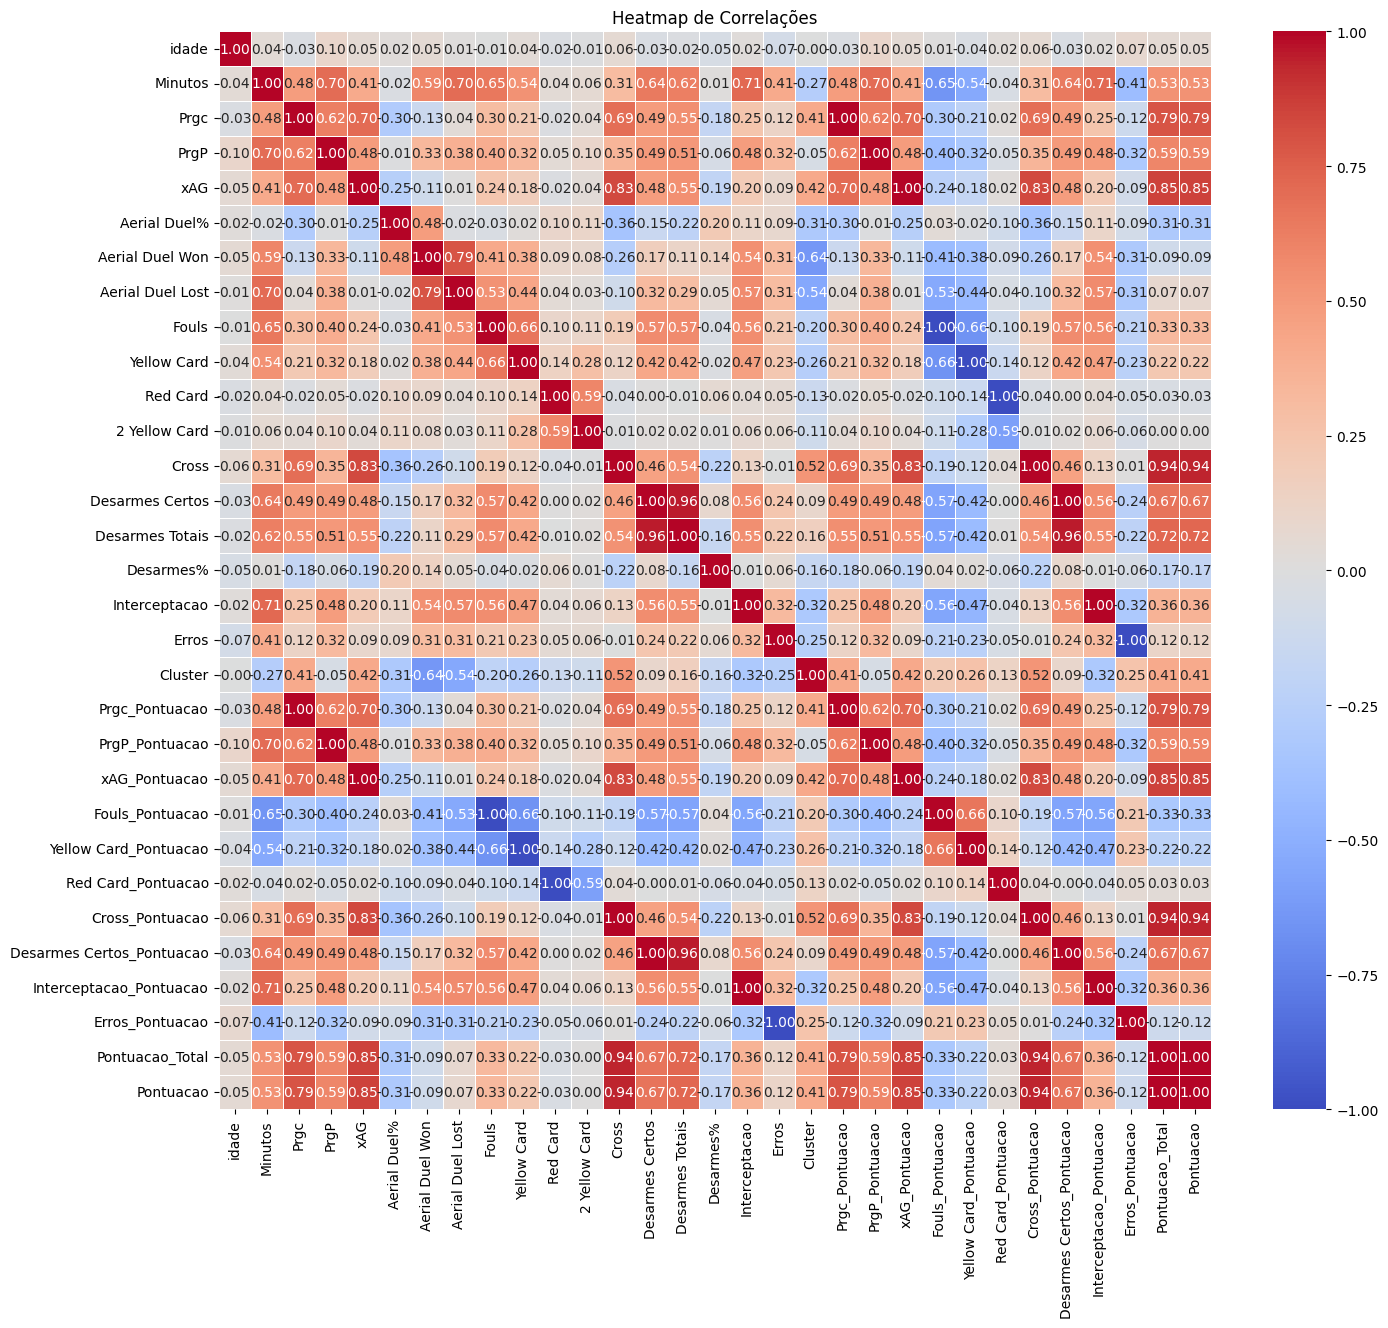

In [42]:
plt.figure(figsize=(16, 14))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

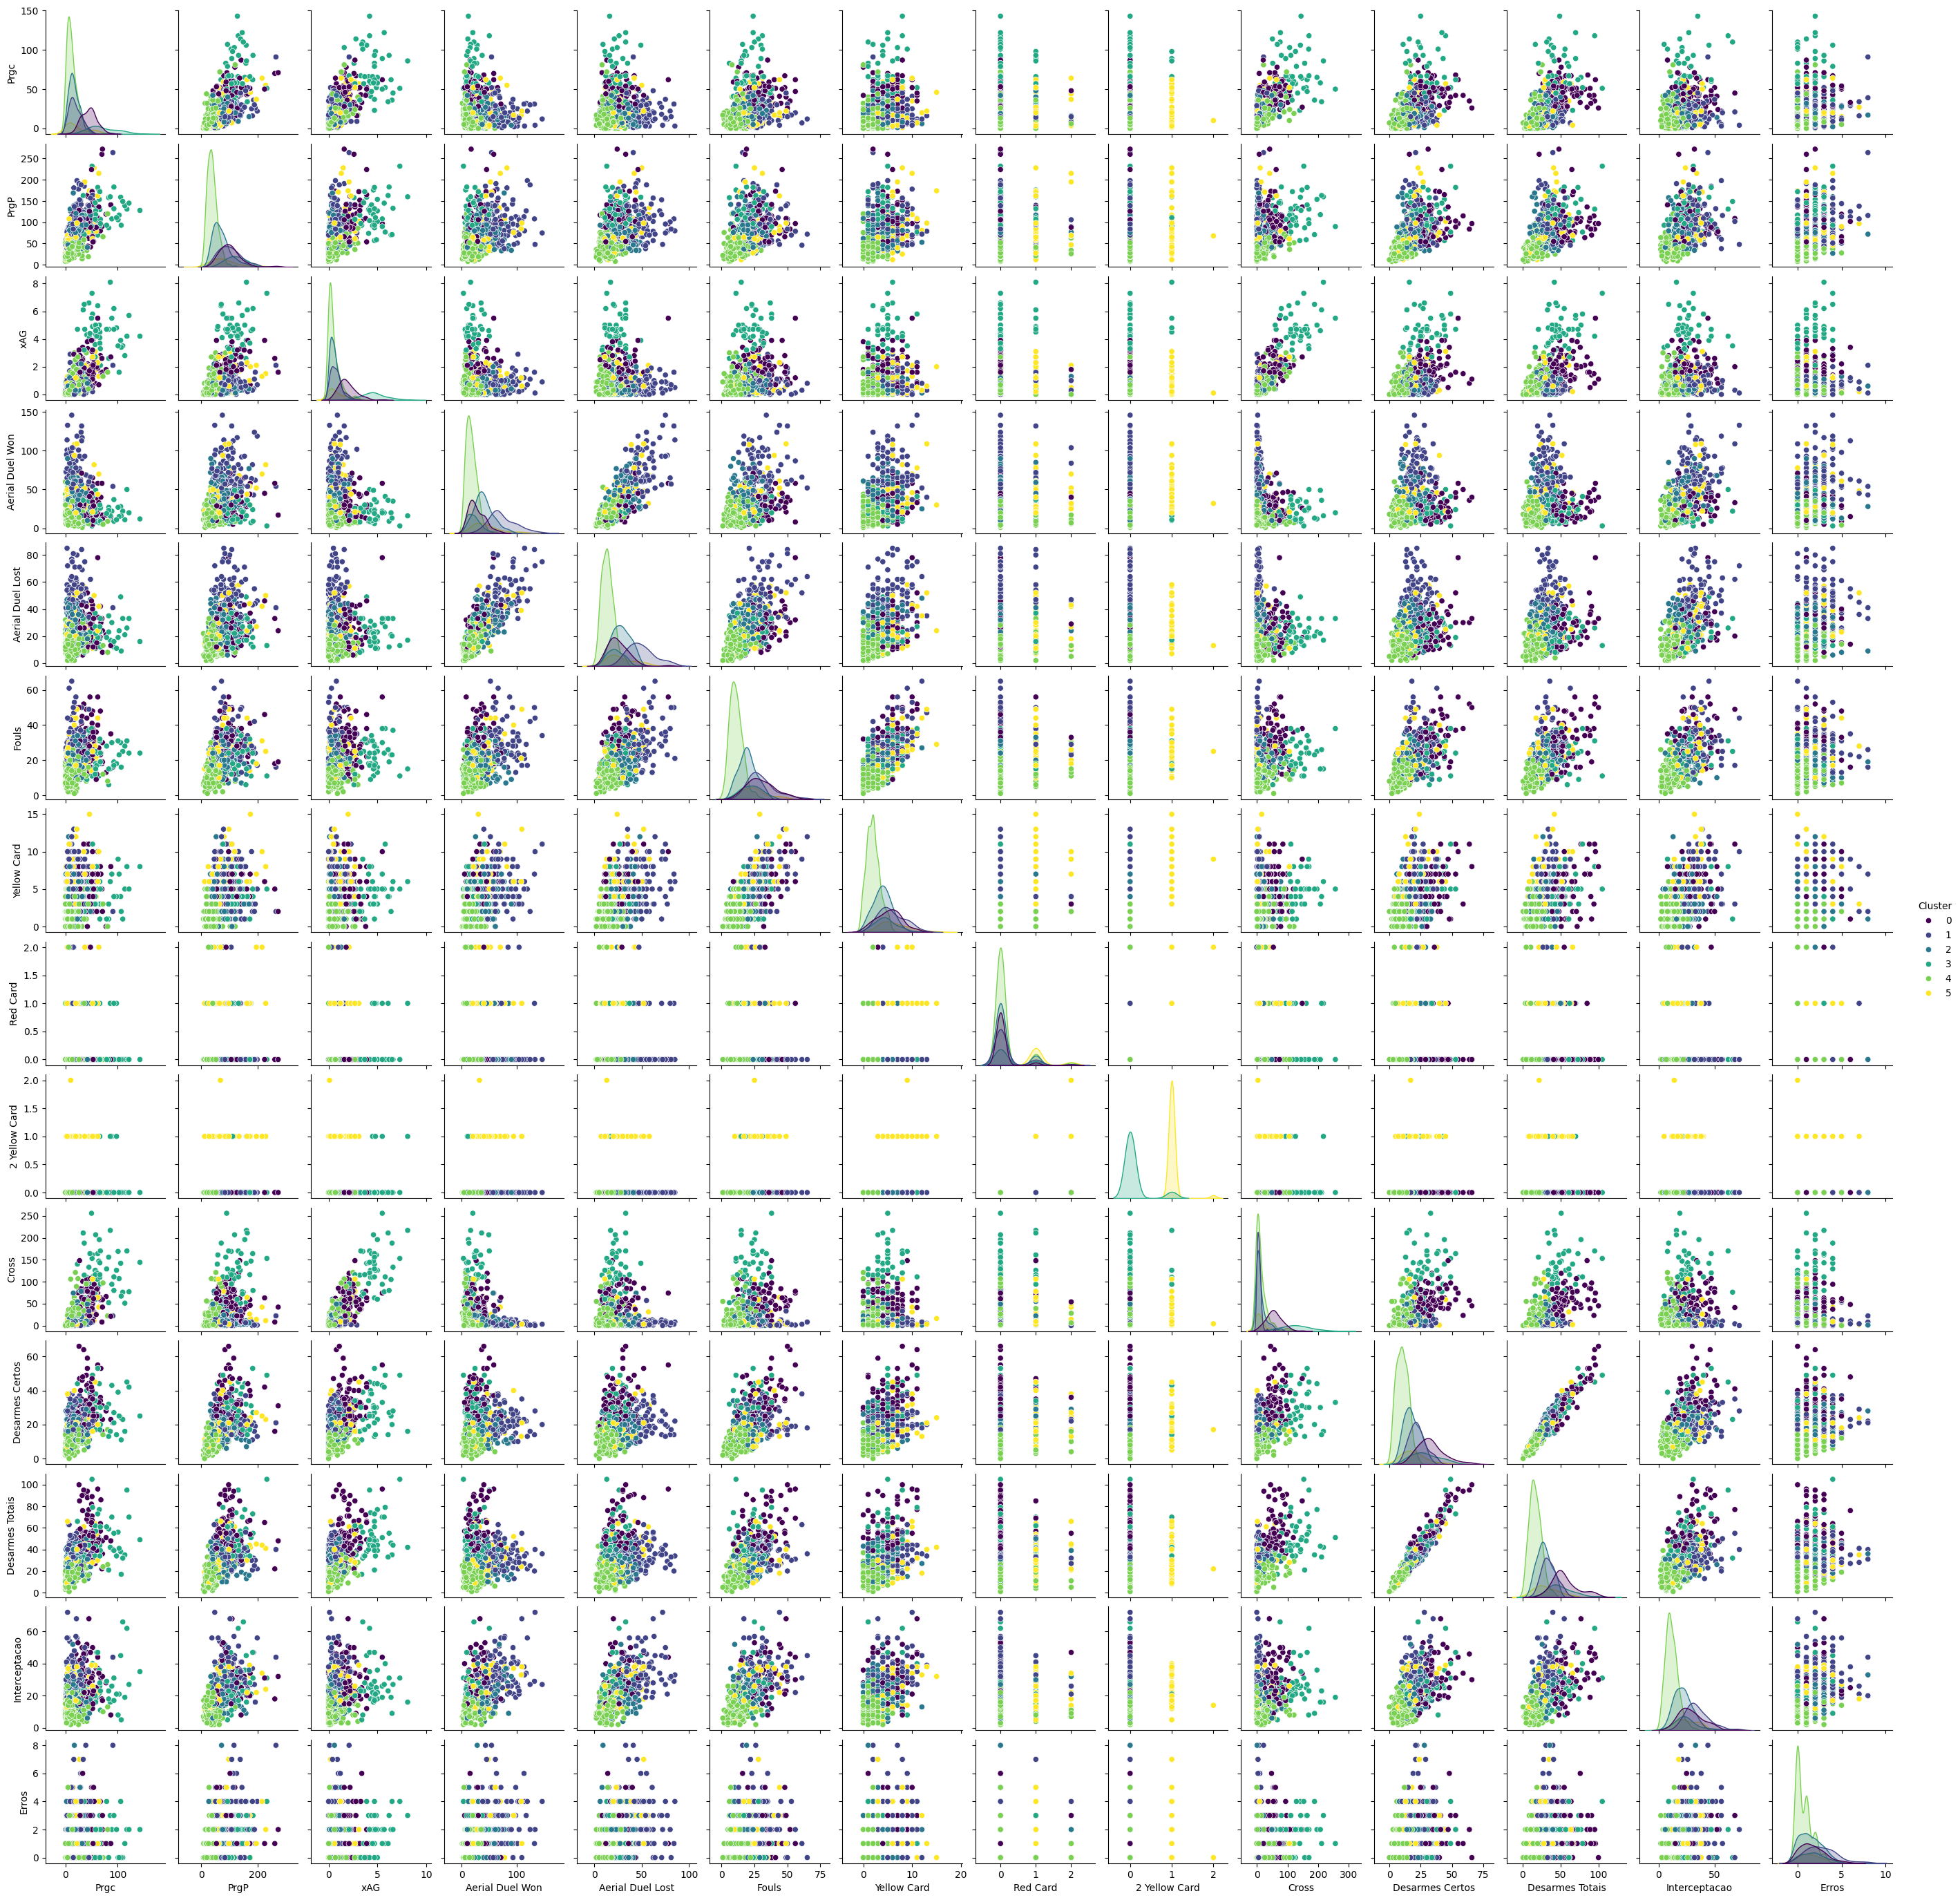

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Lat[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Laterais**

---

### **1. Análise de Correlações com Insights**

A seguir, destaquei os **principais padrões de correlação** encontrados entre variáveis defensivas, ofensivas e disciplinares entre os laterais (LD e LE) das grandes ligas.

---

### 🔗 Correlações Fortes Positivas

#### **Minutos ↔ PrgrP / xAG / Interceptação**

⏱️ Jogadores com mais minutos em campo tendem a:

* Contribuir mais com **passes progressivos (0.69)**,
* Criar **assistências esperadas (xAG: 0.48)**,
* Ter maior número de **interceptações (0.71)**.

🧠 Indica que **laterais mais utilizados** são também os mais confiáveis tanto na construção ofensiva quanto na leitura defensiva.

---

#### **Desarmes Totais ↔ Interceptações (0.54) / Faltas (0.57)**

🔁 Há um padrão de que quem dá mais **desarmes também intercepta mais bolas**, mas também:

* **Comete mais faltas** (possível risco defensivo).

⚖️ Mostra a **agressividade dos laterais na defesa**, que pode vir acompanhada de riscos.

---

#### **Cross ↔ PrgrC (0.69) / xAG (0.48)**

📨 Jogadores que cruzam mais também:

* Executam mais **passes progressivos curtos** (PrgrC),
* Geram **maior expectativa de assistência (xAG)**.

🛣️ Reflete o papel típico de **laterais ofensivos**, que chegam ao terço final e participam da criação.

---

#### **Faltas ↔ Yellow Card (0.66) / Red Card (0.09)**

🟨🟥 Um aumento nas **faltas cometidas** tende a gerar:

* Mais **cartões amarelos**,
* Pequeno aumento em **cartões vermelhos** (embora a correlação seja baixa).

🚨 Laterais com papel defensivo intenso tendem a estar mais expostos a punições.

---

#### **Aerial Duels Won ↔ Aerial Duels Lost (0.79)**

💥 Um dado curioso — quanto mais o jogador **ganha disputas aéreas**, mais ele também **perde**.

📊 Pode indicar laterais que são **muito participativos** no jogo aéreo, mesmo que não tenham 100% de sucesso.

---

### 📉 Correlações Fortes Negativas

#### **Aerial Duel% ↔ Aerial Duel Lost (-0.82)**

📉 Quanto maior a **porcentagem de sucesso nos duelos aéreos**, menor o número de **disputas perdidas**.

✅ Variável bastante intuitiva: laterais mais eficazes no alto **erram menos** nos confrontos.

---

#### **Desarmes% ↔ Faltas (-0.08) / Cartões (-0.18)**

📉 Laterais com alta taxa de sucesso nos desarmes tendem a:

* **Cometer menos faltas**, e
* **Receber menos cartões**.

🛡️ Mostra o perfil de **defensor limpo e técnico**, que desarma com eficiência sem recorrer à falta.

---

## 📌 Conclusão

Os laterais das Top 5 ligas europeias combinam aspectos de **intensidade defensiva**, com **participação ofensiva pela largura do campo**. A análise de correlação mostra que:

* Jogadores mais presentes em campo são mais influentes tanto na defesa quanto na criação,
* A eficácia nos duelos (aéreos ou no chão) está fortemente associada à disciplina,
* Há um equilíbrio interessante entre **agressividade defensiva** e **construção ofensiva**.

---

---

### **2. Perfis dos Clusters com Médias**

---

###  **Cluster 0 – Lateral Equilibrado**

* **Idade:** 26.3
* **Minutos:** 2445 (titular absoluto)
* **Criação (Prgc / PrgP / xAG):** 18 / 90 / 0.72
* **Cruzamentos:** 8.7 → baixo volume ofensivo direto
* **Desarmes:** Bons números, 64.15% de acerto
* **Interceptações:** 31
* **Duelos aéreos:** Vence mais do que perde (61 vs 41) com 59%
* **Cartões:** Poucos cartões e faltas

📌 **Resumo:** Lateral completo, confiável, seguro defensivamente e participa da construção sem exagerar no apoio. Pode jogar em sistemas com 4 defensores.

---

###  **Cluster 1 – Lateral de Suporte Ofensivo**

* **Idade:** 26.0
* **Minutos:** 1980
* **Criação (Prgc / PrgP / xAG):** 22 / 86 / 0.85
* **Cruzamentos:** 15
* **Desarmes:** Bom volume, 63% de acerto
* **Duelos aéreos:** 61% de aproveitamento
* **Cartões:** Mais agressivo, com mais amarelos e 1 expulsão

📌 **Resumo:** Lateral que se projeta mais, contribui com criação e se envolve bastante no jogo. Mais propenso a cartões, ideal para times que jogam com posse ou alas mais altos.

---

###  **Cluster 2 – Lateral Reserva ou em Formação**

* **Idade:** 26.0
* **Minutos:** 1195 (baixo tempo de jogo)
* **Criação (Prgc / PrgP / xAG):** 13.8 / 45.1 / 0.52
* **Cruzamentos:** 14
* **Desarmes:** 62% de acerto, volume menor
* **Interceptações:** 13
* **Duelos aéreos:** 54% de aproveitamento
* **Cartões:** Baixa incidência (provavelmente reflexo da minutagem)

📌 **Resumo:** Menor impacto em campo — pode ser um lateral em adaptação ou de elenco. Nenhum destaque gritante.

---

###  **Cluster 3 – Ala Ofensivo**

* **Idade:** 26.4
* **Minutos:** 2450
* **Criação (Prgc / PrgP / xAG):** **57 / 113 / 3.0** 🔥
* **Cruzamentos:** **86.7** – número absurdo
* **Desarmes:** Altos, mas acerto menor (58%)
* **Duelos aéreos:** Só 48.5% – ponto fraco
* **Erros:** Relativamente controlado
* **Cartões:** Moderado

📌 **Resumo:** Um **ala quase ponta**, ofensivamente monstruoso. Precisa de cobertura defensiva. Ideal pra linha de 3 zagueiros ou esquema de alas.

---


In [43]:
cluster_names = {
    0: 'Laterais equilibrado',
    1: 'Laterais ofensivo',
    2: 'Laterais sr',
    3: 'Laterais ala',
}

# Adicionar nomes ao DataFrame
Lat['Perfil'] = Lat['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Lat[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros','Perfil']].head())

               jogador     time posicao  idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros                Perfil
0            Ben White  Arsenal      DF     26     1198    23    59  1.4          66.7               18                 9     10            2         0              0     17               16               38       42.1             16      0           Laterais sr
6    Gabriel Magalhães  Arsenal      DF     26     2363    10   126  0.9          58.9               53                37     19            4         0              0      9               12               16       75.0             16      2  Laterais equilibrado
8         Jakub Kiwior  Arsenal      DF     24     1122     5    48  0.3          45.8               11                13     10            1         0              0      2               11               15    

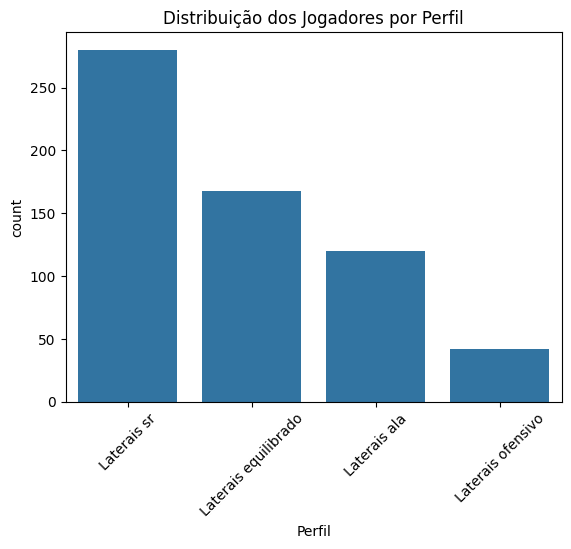

In [44]:
sns.countplot(data=Lat, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [47]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "Laterais equilibrado"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: Laterais equilibrado
                    jogador         time posicao  idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
6         Gabriel Magalhães      Arsenal      DF     26     2363    10   126  0.9          58.9               53                37     19            4         0              0      9               12               16       75.0             16      2
24           William Saliba      Arsenal      DF     23     3039    16   138  0.9          62.9               61                36     28            2         1              0      3               21               28       75.0             21      7
60             Dean Huijsen  Bournemouth      DF     19     2427    41   132  2.0          60.7               68                44     31           10         0              0     12               18        

In [49]:
# Dicionário dos peso para cada métrica
pesos = {
    'Prgc': 2,
    'PrgP': 2,
    'xAG' : 10,
    'Fouls': -3,
    'Yellow Card': -5,
    'Red Card': -10,
    'Cross': 10,
    'Desarmes Certos': 10,
    'Interceptacao' : 5,
    'Erros' : -2,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Lat[coluna + '_Pontuacao'] = Lat[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Lat['Pontuacao_Total'] = Lat[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Lat['Pontuacao_Total'].min()
max_pontuacao = Lat['Pontuacao_Total'].max()
Lat['Pontuacao'] = (
    (Lat['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'Laterais ala'
jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: Laterais ala
 Ranking            time posicao                      jogador       Perfil  Pontuacao
       1           Genoa      DF                 Aarón Martín Laterais ala      100.0
       2       Tottenham      DF                  Pedro Porro Laterais ala  93.113389
       3      Leverkusen      DF                Álex Grimaldo Laterais ala  90.807175
       4          Fulham      DF             Antonee Robinson Laterais ala  89.878283
       5       Stuttgart      DF       Maximilian Mittelstädt Laterais ala  89.109545
       6        Cagliari      DF              Tommaso Augello Laterais ala  87.347854
       7       Liverpool      DF       Trent Alexander-Arnold Laterais ala  86.194747
       8         Bologna      DF                 Juan Miranda Laterais ala  84.977578
       9         Osasuna      DF                  Jesús Areso Laterais ala  76.040999
      10          Bochum      DF            Maximilian Wittek Laterais ala  75.912876
      11

In [50]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'Laterais ofensivo'  # Defina o perfil desejado
jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'Laterais ofensivo': ['Jan Paul van Hecke', 'Marc Cucurella', 'Chris Richards', 'Marc Guéhi', 'Axel Tuanzebe', 'Djed Spence', 'Konstantinos Mavropanos', 'Aitor Paredes', 'Marcos Alonso', 'Domingos Duarte', 'Juan Berrocal', 'Ki-Jana Hoever', 'Massadio Haïdara', 'Facundo Medina', 'Bafodé Diakité', 'Derek Cornelius', 'Leonardo Balerdi', 'Vanderson', 'Boubakar Kouyaté', 'Moïse Bombito', 'Joseph Okumu', 'Maxime Bernauer', 'Cedric Zesiger', 'Keven Schlotterbeck', 'Nico Schlotterbeck', 'Arthur Theate', 'Andreas Hanche-Olsen', 'Julian Chabot', 'Marco Friedl', 'Niklas Stark', 'Yerry Mina', 'Edoardo Goldaniga', 'Marc-Oliver Kempf', 'Marin Pongračić', 'Nicolás Valentini', 'Alessandro Bastoni', 'Fikayo Tomori', 'Pablo Marí', 'Lautaro Valenti', 'Hassane Kamara', 'Jaka Bijol', 'Oumar Solet']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking                 jogador  Valor de Mercado (€M)  Pontuacao  Custo 


Jogadores selecionados: Trent Alexander-Arnold, Joško Gvardiol, Alejandro Balde, Jules Koundé, Nuno Mendes
                     jogador             time posicao  idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
336   Trent Alexander-Arnold        Liverpool      DF     25     2365    51   232  7.3          18.8                3                13     11            5         0              0    153               49              105       46.7             31      4
351           Joško Gvardiol  Manchester City      DF     22     3277    91   264  2.1          56.8               54                41     16            2         0              0     22               21               40       52.5             44      8
658          Alejandro Balde        Barcelona      DF     20     2284   107    93  3.4          64.0               16          

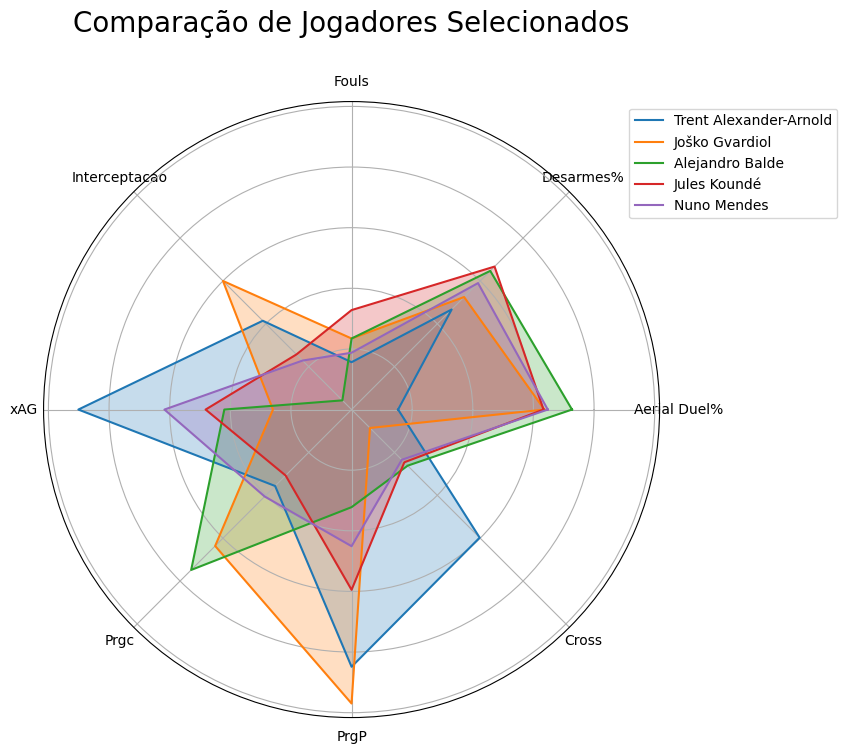

In [54]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Aerial Duel%', 'Desarmes%', 'Fouls', 'Interceptacao','xAG','Prgc', 'PrgP','Cross',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Nuno Mendes','Trent Alexander-Arnold','Joško Gvardiol','Jules Koundé','Alejandro Balde']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Lat)